In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/

In [3]:
from src.ItemItemRecommender import ItemItemRecommender
from sklearn.model_selection import train_test_split

In [4]:
from datetime import datetime

In [5]:
#Current SQL query
"""
SELECT 
geo__country, 
#geo__city,
event_params__video_title,
event_params__videotitle,
event_name,
#COUNT(event_name) AS times_completed,
FROM `jfp-data-warehouse.production_firebase.firebase_event` 
WHERE geo__country in ('Afghanistan',
 'Algeria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Bhutan',
 'Brunei',
 'China',
 'Egypt',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Japan',
 'Jordan',
 'Kazakstan',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Libya',
 'Malaysia',
 'Maldives',
 'Mali',
 'Mauritania',
 'Mongolia',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Niger',
 'North Korea',
 'Oman',
 'Pakistan',
 'Palestine',
 'Qatar',
 'Russia',
 'Saudia Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Syria',
 'Tajikistan',
 'Thailand',
 'Timor Leste',
 'Tunisia',
 'Turkey',
 'Turkmenistan',
 'UAE',
 'Uzbekistan',
 'Vietnam',
 'Yemen') AND 
event_params__video_title IS NOT NULL AND
event_name IN ('videostarts',  'videoplay',  'a_media_progress10',  'a_media_progress25',  'a_media_progress50',  'a_media_progress75',  'a_media_progress90') AND 
DATE(event_date_partition) 
BETWEEN  "2021-01-01" AND "2021-04-14" 
GROUP BY 
geo__country, 
geo__city,
event_params__videotitle, 
event_params__video_title,
event_name
ORDER BY 
geo__country,
event_params__video_title
#times_completed DESC 
LIMIT 16000
""";

In [6]:
data = pd.read_csv('/Users/djbetts/Desktop/jf_project/data/recommender_base_top_50.csv')

In [7]:
df = data.copy()
#df.drop(['geo__city', 'times_completed'], axis=1, inplace=True)

In [8]:
df.columns

Index(['geo__country', 'event_params__video_title', 'event_params__videotitle',
       'event_name'],
      dtype='object')

In [9]:
df['video_title'] = df['event_params__videotitle'].fillna(df['event_params__video_title'])

In [10]:
df.drop(['event_params__videotitle','event_params__video_title'], axis=1, inplace=True)

In [11]:
(df.geo__country.value_counts())

India          7243
Egypt          2810
China          2143
Bangladesh     2103
Algeria         621
Afghanistan     390
Bahrain         256
Azerbaijan      233
Bhutan          130
Brunei           71
Name: geo__country, dtype: int64

In [12]:
df.event_name.value_counts()

videoplay             2871
videostarts           2781
a_media_progress10    2408
a_media_progress25    2225
a_media_progress50    2048
a_media_progress75    1891
a_media_progress90    1776
Name: event_name, dtype: int64

<AxesSubplot:>

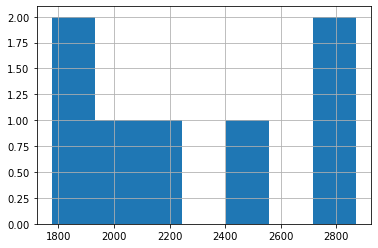

In [13]:
df.event_name.value_counts().hist(bins=7)

In [14]:
df.video_title.value_counts()

Baptism of Jesus by John    1161
Childhood of Jesus          1158
Birth of Jesus              1151
JESUS                        806
Chosen Witness               686
                            ... 
Witness to the Son             1
This Is Freedom                1
奮鬥與成就                          1
The Li Yan Story               1
得救的确据                          1
Name: video_title, Length: 435, dtype: int64

In [15]:
#df.video_title.hist(bins=435);

# 90% progress through video

In [16]:
#df_90 = df[df['event_name'] == 'a_media_progress90']

In [17]:
#df_90.video_title.unique()

In [18]:
#df_90.geo__country.value_counts()

In [19]:
#country_groupby = df.groupby('geo__country')

In [20]:
#country_groupby['video_title'].unique()

In [21]:
#india = country_groupby.get_group('India')

In [22]:
#falling_plates_india = india[india['video_title'] == '#FallingPlates']

In [23]:
#event_score = falling_plates_india.event_name.value_counts()

In [24]:
#event_score.index

In [25]:
#keys = df.video_title.unique()
#reviews = dict.fromkeys(keys, 0)

In [26]:
#tried to make a function by iterating through a groupby. couldn't figure it out.

# def rating_calculator(group):
#     rating = 0
#     reviews = dict.fromkeys(set(group.video_title), 0)
#     for event_name in group.event_name:
#         if event_name == 'videostarts' or event_name == 'videoplay':
#             reviews[group.video_title] += 1
#         elif event_name == 'a_media_progress10':
#             reviews[group.video_title] += (1 * .1)
#         elif event_name == 'a_media_progress25':
#             reviews[group.video_title] += (1 * .25)
#         elif event_name == 'a_media_progress50':
#             reviews[group.video_title] += (1 * .5)
#         elif event_name == 'a_media_progress75':
#             reviews[group.video_title] += (1 * .75)
#         elif event_name == 'a_media_progress90':
#             reviews[group.video_title] += (1 * .9)
#     print(f'total: {rating}\nnormalized: {rating/len(events)}')
#     return (reviews)
# #     return
# # print(rating)
# # print(rating/len(event_score))

In [27]:
#rating_calculator(event_score)

In [28]:
# #BROKEN
# def review_builder(country_groupby):
#     review_dic = dict.fromkeys(country_groupby.groups.keys(), None)
#     print(review_dic)
#     for country, group in country_groupby:
#         review_dic[country] = rating_calculator(group)
#     return review_dic

# function to return score. not normalized

In [29]:
def view_to_rating(event_name):
    d ={
        'videostarts':.01,
        'videoplay':.01, 
        'a_media_progress10':(1*.1),
        'a_media_progress25':(1*.25),
        'a_media_progress50':(1*.5), 
        'a_media_progress75':(1*.75), 
        'a_media_progress90':(1*.9)
    }
    
    return(d[event_name])

In [30]:
#view_to_rating('a_media_progress90')

In [31]:
df['score'] = df.event_name.apply(view_to_rating)

In [32]:
df.drop(['event_name'], axis=1, inplace=True)

<AxesSubplot:>

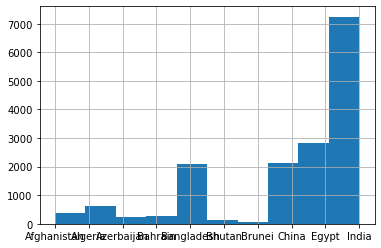

In [33]:
df.geo__country.hist()

In [83]:
groupby = df.groupby(['geo__country','video_title'])

In [84]:
review_scores = groupby.sum()

In [94]:
review_scores.loc[('Bhutan', 'LUMO - John 21:1-25')]

score    0.12
Name: (Bhutan, LUMO - John 21:1-25), dtype: float64

In [112]:
review_scores.loc[('Bhutan','LUMO - John 21:1-25')]

score    0.12
Name: (Bhutan, LUMO - John 21:1-25), dtype: float64

In [113]:
review_scores.index

MultiIndex([('Afghanistan',                         '#FallingPlates'),
            ('Afghanistan',                     'Angels at the Tomb'),
            ('Afghanistan',               'Baptism of Jesus by John'),
            ('Afghanistan',                             'Beatitudes'),
            ('Afghanistan',                         'Birth of Jesus'),
            ('Afghanistan',    'Blessed are those Who Hear and Obey'),
            ('Afghanistan',                                'Breathe'),
            ('Afghanistan',                        'Burial of Jesus'),
            ('Afghanistan',                     'Childhood of Jesus'),
            ('Afghanistan',                         'Chosen Witness'),
            ...
            (      'India',                              'Episode 9'),
            (      'India', 'Eutychus Raised From the Dead at Troas'),
            (      'India',        'Explanation of Miraculous Birth'),
            (      'India',                           'Fallin

In [37]:
from scipy import sparse
from scipy.sparse import csr_matrix

In [115]:
df_sparce = df.pivot_table(columns='video_title', values='score', index='geo__country', aggfunc='mean', fill_value=0)
movie_list = pd.Series(df_sparce.columns)
users = pd.Series(df_sparce.index)

In [39]:
df_sparce.shape

(10, 435)

In [40]:
number_ratings = (df_sparce.values > 0).sum()
density = number_ratings / (df_sparce.shape[0] * df_sparce.shape[1])
print('The desnsity is: {} '.format(density))

The desnsity is: 0.19057471264367817 


Min number of ratings: 9


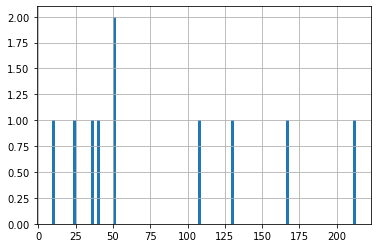

In [41]:
ratings = (df_sparce > 0).sum(axis=1)
ratings.hist(bins=100)
print('Min number of ratings: {}'.format(ratings.min()))

Min number of ratings: 1


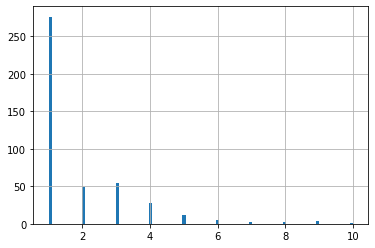

In [42]:
ratings = (df_sparce > 0).sum(axis=0)
ratings.hist(bins=100)
print('Min number of ratings: {}'.format(ratings.min()))

# rec

In [43]:
df_sparce.index

Index(['Afghanistan', 'Algeria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Bhutan', 'Brunei', 'China', 'Egypt', 'India'],
      dtype='object', name='geo__country')

In [45]:
train, test = train_test_split(df_sparce, random_state = 100)

In [116]:
ratings_as_mat = csr_matrix(df_sparce.values, (df_sparce.index.shape[0], df_sparce.columns.shape[0]))

In [119]:
print(train.shape)
print(test.shape)
print(df_sparce.shape)

(7, 435)
(3, 435)
(10, 435)


In [120]:
ratings_as_mat.shape

(10, 435)

In [121]:
rec = ItemItemRecommender(neighborhood_size=75)
rec.fit(ratings_as_mat)

In [122]:
rec.pred_one_user(user_id=1);

/Users/djbetts/Desktop/jf_project/src/ItemItemRecommender.py:43: RuntimeWarning: invalid value encountered in true_divide
  self.item_sim_mat[item_to_rate, relevant_items].sum()


In [123]:
rec.pred_all_users(report_run_time=True);

Execution time: 0.680560 seconds


In [125]:
# test.shape

In [131]:
users[5]

'Bhutan'

In [132]:
movie_list.loc[rec.top_n_recs(user_id=5, n=10)]

172                                   Jätku Leiba
245                          Struggle and Triumph
159                    Jesus Taken Up Into Heaven
286                                  Who are you?
237                             Simeon's Prophecy
208                     Official&#39;s Son Healed
252    The Arrest of Jesus and Peter&#39;s Denial
202              Matthias Chosen to Replace Judas
225     Peter&#39;s Miraculous Escape From Prison
37                                  Bread of Life
Name: video_title, dtype: object

In [133]:
users[1]

'Algeria'

# test

In [134]:
test

video_title,#FallingPlates,#फालिंगप्लेट्स,#掉落的盘子,1- في العائلة,"1. Jesus, Our Loving Pursuer",1.가족 중에,1.우리의 사랑의 추구자이신 예수님,2- عمل يدوي,"2. Jesus, Our Gracious Forgiver","3. Jesus, Our Power for Living",...,路加福音简介,身份错认于路司得,返回叙利亚的安提阿,选出马提亚替代犹大,那些使人犯罪的人有祸了,钉在十字架上的囚犯,雅典的偶像,非斯都咨询亚基帕王,高贵的比里亚人,魔鬼引诱耶稣
geo__country,,,,,,,,,,,,,,,,,,,,,
China,0.36,0.0,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.262727,0.36,0.36,0.36,0.27,0.226364,0.36,0.31625,0.36,0.174
Brunei,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00000,0.00,0.000
Algeria,0.36,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00000,0.00,0.000


In [135]:
# bhutan_score = test[test.index == 1]
# bhutan_score

In [136]:
bhutan_pred = rec.pred_one_user(user_id=1)

/Users/djbetts/Desktop/jf_project/src/ItemItemRecommender.py:43: RuntimeWarning: invalid value encountered in true_divide
  self.item_sim_mat[item_to_rate, relevant_items].sum()


In [137]:
# user_nine['prediction'] = bhutan_pred[test[test.index == 1].movie_list.values]
# user_nine

# top rated movies

In [ ]:
average_rating = df.groupby('video_title').mean()['score']

In [ ]:
average_rating.sort_values(ascending=False)

# utility matrix work

In [ ]:
index = df.geo__country.unique()

In [ ]:
columns = df.video_title.unique()

In [ ]:
data = np.zeros((index.shape[0], columns.shape[0]))

In [ ]:
reviews = pd.DataFrame(data, index=index, columns=columns)

In [ ]:
reviews

In [ ]:
df.head()